<a href="https://colab.research.google.com/github/pkondacs/marketdata/blob/master/Asset_Portfolio_by_using_yfinance_tickers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Databricks notebook source
# MAGIC %md
# MAGIC # Install some necessary packages

# COMMAND ----------

# activates the matplotlib to be displayed inline
# %matplotlib inline
# %pip install pandas-datareader
# %pip install quandl
# %pip install python-dotenv
# %pip install yfinance

# COMMAND ----------

# MAGIC %md ##Using the yfinance package

# COMMAND ----------
import yfinance as yf
import pandas as pd

tickers = ["AAPL","MSFT","NG=F","CL=F"]

# Fetch stock price data for Apple and Microsoft
dfs = []
for ticker in tickers:
    df = yf.download(ticker, start="2000-01-01")
    dfs.append(df)

# Concatenate Apple and Microsoft stock price dataframes
combined_df = pd.concat([df['Close'] for df in dfs], axis=1, keys=tickers)
combined_df.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,AAPL,MSFT,NG=F,CL=F
Date,,,,
2000-01-03,0.999442,58.28125,NaN,NaN
2000-01-04,0.915179,56.31250,NaN,NaN
2000-01-05,0.928571,56.90625,NaN,NaN
2000-01-06,0.848214,55.00000,NaN,NaN
2000-01-07,0.888393,55.71875,NaN,NaN


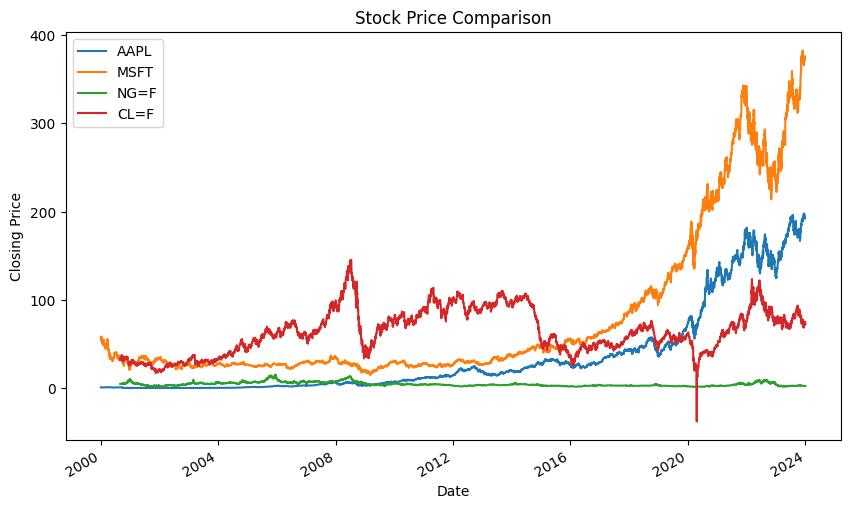

In [3]:
import matplotlib.pyplot as plt

# Plot the combined stock price data
combined_df.plot(figsize=(10, 6))

# Set the chart title and labels
plt.title('Stock Price Comparison')
plt.xlabel('Date')
plt.ylabel('Closing Price')

# Display the legend
plt.legend(tickers)

# Display the chart
plt.show()

In [18]:
print(combined_df.index)

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2024-01-02'],
              dtype='datetime64[ns]', name='Date', length=6043, freq=None)


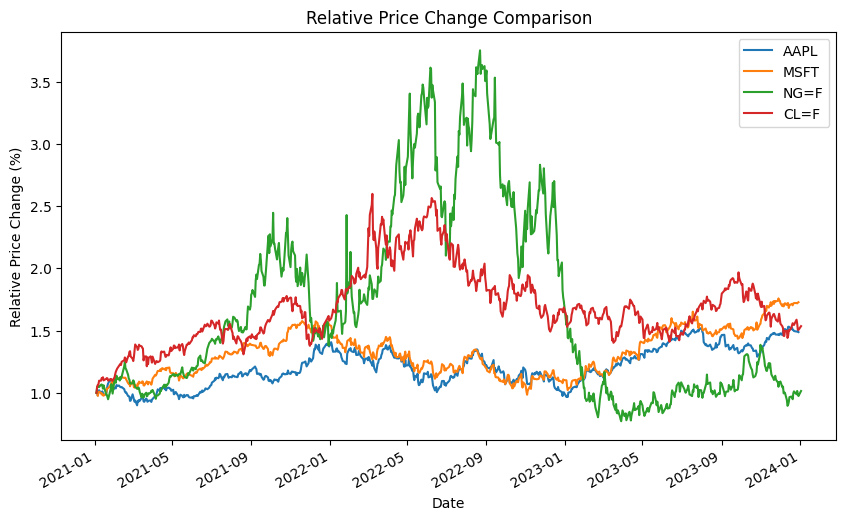

In [29]:
# Define the fixed date from which to calculate relative price change
fixed_date = '2021-01-04'

# Check if the fixed date is present in the index
if fixed_date not in combined_df.index:
    print(f"Fixed date {fixed_date} is not present in the data.")
else:
    # combined_df['Date'] = pd.to_datetime(combined_df['Date']) # Date is already datetime type
    # combined_df.set_index('Date', inplace=True) # Date is already an index in the imported yfinance dataframe

    # Ensure the fixed_date is a datetime object
    fixed_date = pd.to_datetime(fixed_date)
    # Get the prices on the fixed date
    fixed_date_prices = combined_df.loc[fixed_date]
    # Calculate the percentage change relative to the fixed date
    price_changes = combined_df.divide(fixed_date_prices)

    # Slice the DataFrame to only include rows from the fixed_date onwards
    price_changes_from_fixed = price_changes.loc[fixed_date:]

    # Plot the relative price change data
    price_changes_from_fixed.plot(figsize=(10, 6)) # You can adjust the figure size as needed
    # Set the chart title and labels
    plt.title('Relative Price Change Comparison')
    plt.xlabel('Date')
    plt.ylabel('Relative Price Change (%)')
    # Display the legend
    plt.legend(tickers)
    # Display the chart
plt.show()

In [5]:
display(relative_df)

,AAPL,MSFT,NG=F,CL=F
Date,,,,
2000-01-03,0.549114,17.410381,NaN,NaN
2000-01-04,0.502818,16.822255,NaN,NaN
2000-01-05,0.510176,16.999627,NaN,NaN
2000-01-06,0.466026,16.430172,NaN,NaN
2000-01-07,0.488101,16.644884,NaN,NaN
...,...,...,...,...
2023-12-26,106.065606,111.922331,66.841413,99.329650
2023-12-27,106.120543,111.746081,68.650063,97.410619
2023-12-28,106.356798,112.107543,67.024899,94.334904
